<a href="https://colab.research.google.com/github/kaiju8/Beginner-s-Hypothesis/blob/main/GANs_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

from torch.utils.data import DataLoader

import numpy as np

import matplotlib.pyplot as plt

In [14]:
class Discriminator(nn.Module):
  def __init__(self, img_dim):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(img_dim, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128, 1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    return self.disc(x)

class Generator(nn.Module):
  def __init__(self, z_dim, img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.1),
        nn.Linear(256, img_dim),
        nn.Tanh(), 
    )
  def forward(self, x):
    return self.gen(x)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

GANs are very sensitive to hyperparameters

In [16]:
lr = 3e-4 #vary 
z_dim = 64 #vary
img_dim = 28 * 28 * 1
batch_size = 64
num_epochs = 100

In [17]:
disc = Discriminator(img_dim).to(device)
gen = Generator(z_dim, img_dim).to(device)

In [18]:
train_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)
dataset = datasets.MNIST(root = "dataset", transform = train_transforms, download = True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle = True)

In [19]:
opt_disc = optim.Adam(disc.parameters(), lr = lr)
opt_gen = optim.Adam(gen.parameters(), lr = lr)

In [20]:
criterion = nn.BCELoss()

In [21]:
def show(imgs): #Show function from pytorch.org
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [22]:
fixed_noise = torch.randn((batch_size, z_dim)).to(device) #For per epoch visualisation

Epoch [0/100] Batch 0/938 \Loss D: 0.6387, loss G: 0.7146
Epoch [1/100] Batch 0/938 \Loss D: 0.4421, loss G: 1.1757
Epoch [2/100] Batch 0/938 \Loss D: 0.3756, loss G: 1.3624
Epoch [3/100] Batch 0/938 \Loss D: 0.4933, loss G: 1.4477
Epoch [4/100] Batch 0/938 \Loss D: 0.5559, loss G: 0.9734
Epoch [5/100] Batch 0/938 \Loss D: 0.8146, loss G: 0.6899
Epoch [6/100] Batch 0/938 \Loss D: 0.6852, loss G: 1.0246
Epoch [7/100] Batch 0/938 \Loss D: 0.7046, loss G: 0.7886
Epoch [8/100] Batch 0/938 \Loss D: 0.3351, loss G: 1.7361
Epoch [9/100] Batch 0/938 \Loss D: 0.5762, loss G: 0.9373
Epoch [10/100] Batch 0/938 \Loss D: 0.5237, loss G: 1.0119
Epoch [11/100] Batch 0/938 \Loss D: 0.5507, loss G: 0.9879
Epoch [12/100] Batch 0/938 \Loss D: 0.7102, loss G: 0.8403
Epoch [13/100] Batch 0/938 \Loss D: 0.5992, loss G: 0.9580
Epoch [14/100] Batch 0/938 \Loss D: 0.3739, loss G: 1.3146
Epoch [15/100] Batch 0/938 \Loss D: 0.5869, loss G: 1.1750
Epoch [16/100] Batch 0/938 \Loss D: 0.6334, loss G: 1.1667
Epoch [

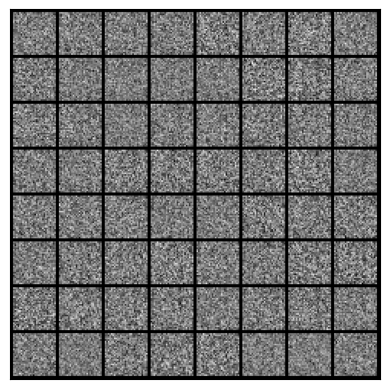

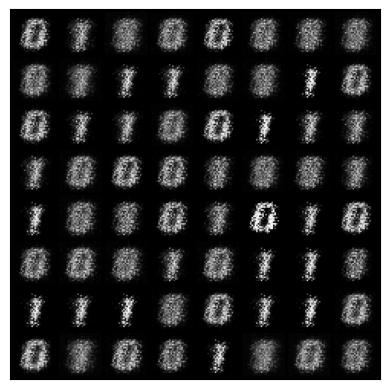

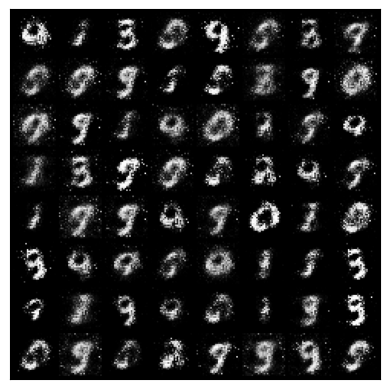

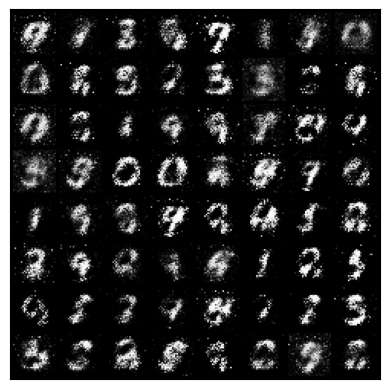

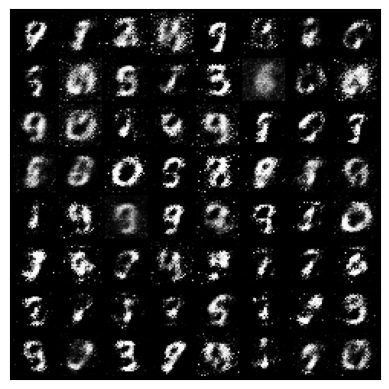

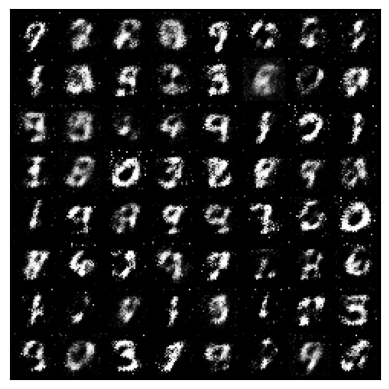

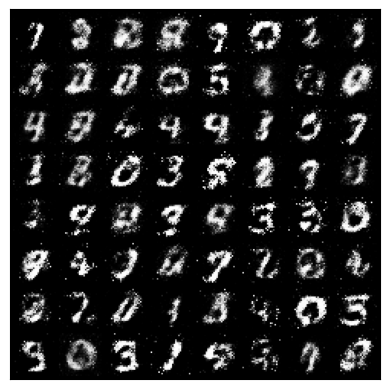

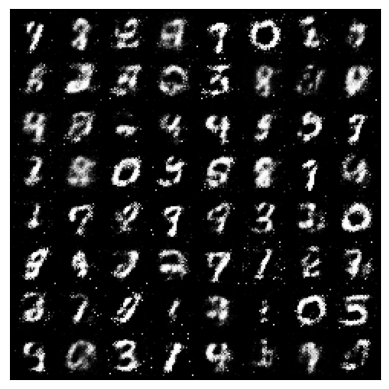

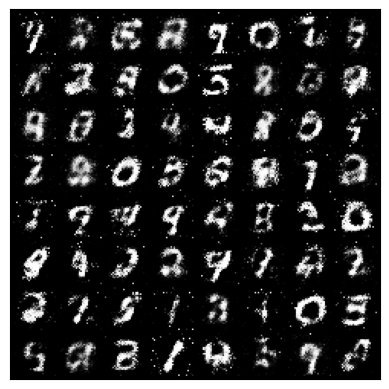

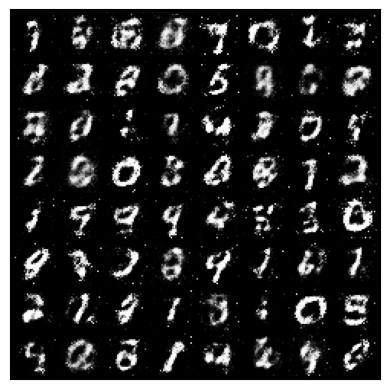

In [23]:
for epoch in range(num_epochs):
  for batch_idx, (real, _) in enumerate(loader):
    real = real.view(-1, 784).to(device)
    batch_Size = real.shape[0]

    #Discriminator max log(D(real)) + log(1 - D(G(z)))

    noise = torch.randn((batch_size, z_dim)).to(device)
    fake = gen(noise)

    disc_real = disc(real).view(-1)
    loss_real = criterion(disc_real, torch.ones_like(disc_real))

    disc_fake = disc(fake).view(-1)# detach for generator stuff or a
    loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    loss_D = (loss_real + loss_fake)/2

    disc.zero_grad()
    loss_D.backward(retain_graph = True)# a
    opt_disc.step()

    #Discriminator min log(1 - D(G(z))) but better to max log(D(G(z)))

    output = disc(fake).view(-1)
    loss_G = criterion(output, torch.ones_like(output))

    gen.zero_grad()
    loss_G.backward(retain_graph = True)# a
    opt_gen.step()


###################################################
    if (batch_idx == 0) :
        print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \Loss D: {loss_D:.4f}, loss G: {loss_G:.4f}")

        if (epoch%(num_epochs/10) == 0):
            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                show(img_grid_fake)
####################################################

In [25]:
disc = Discriminator(img_dim).to(device)
gen = Generator(z_dim, img_dim).to(device)

opt_disc = optim.Adam(disc.parameters(), lr = lr)
opt_gen = optim.Adam(gen.parameters(), lr = lr)

Epoch [0/100] \Loss D: 0.6626, loss G: 0.7368
Epoch [10/100] \Loss D: 0.4154, loss G: 0.6206
Epoch [20/100] \Loss D: 0.2445, loss G: 1.0923
Epoch [30/100] \Loss D: 0.3518, loss G: 0.9145
Epoch [40/100] \Loss D: 0.3355, loss G: 1.0343
Epoch [50/100] \Loss D: 0.1768, loss G: 1.6934
Epoch [60/100] \Loss D: 0.2126, loss G: 1.5867
Epoch [70/100] \Loss D: 0.1546, loss G: 1.8881
Epoch [80/100] \Loss D: 0.1260, loss G: 2.2280
Epoch [90/100] \Loss D: 0.0878, loss G: 2.6000


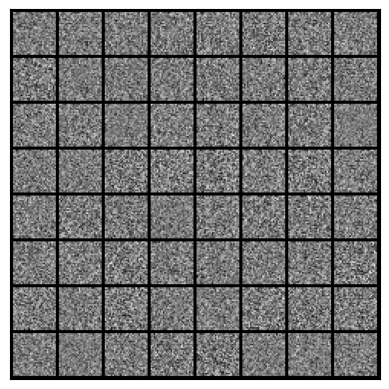

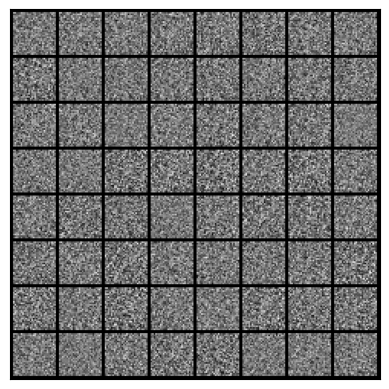

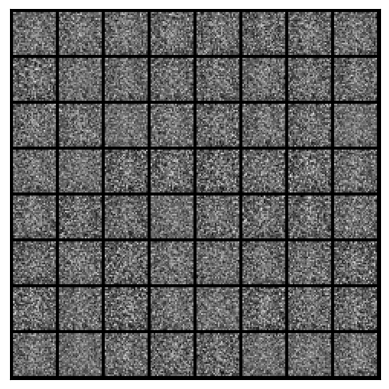

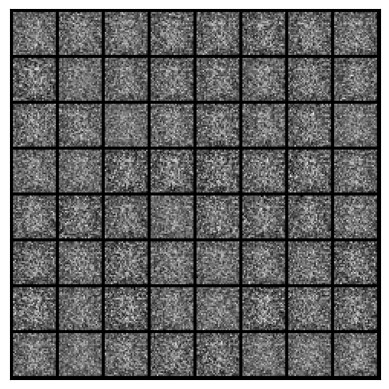

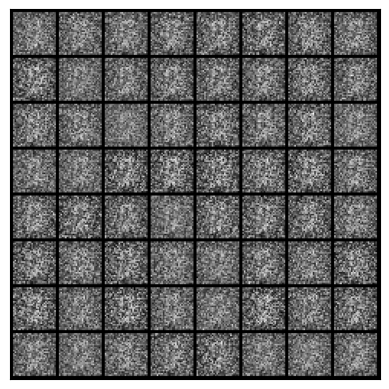

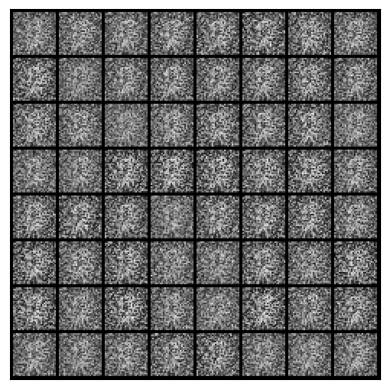

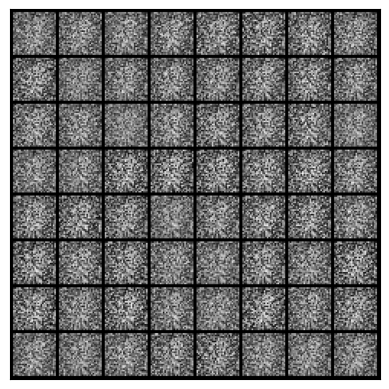

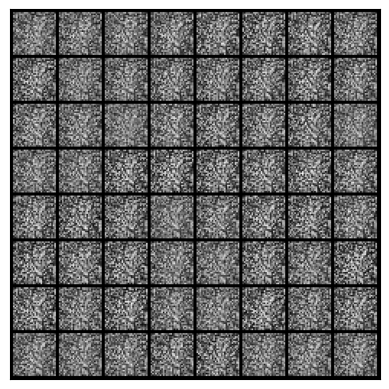

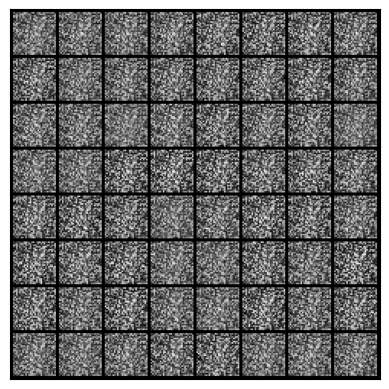

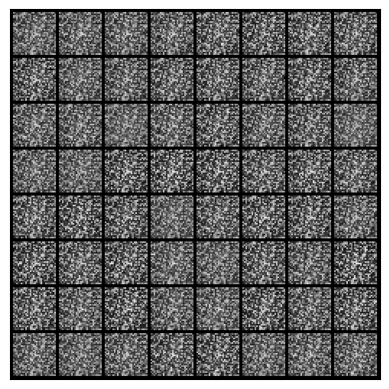

In [26]:
for epoch in range(num_epochs):

    #Discriminator max log(D(real)) + log(1 - D(G(z)))
    
    k = 2
    for _ in range(k):

        real, _ = next(iter(loader))

        real = real.view(-1, 784).to(device)
        #batch_size = real.shape[0]

        noise = torch.randn((batch_size, z_dim)).to(device)
        fake = gen(noise)

        disc_real = disc(real).view(-1)
        loss_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake).view(-1)# detach for generator stuff or a
        loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_D = (loss_real + loss_fake)/2

        disc.zero_grad()
        loss_D.backward()# a
        opt_disc.step()

    #Discriminator min log(1 - D(G(z))) but better to max log(D(G(z)))

    noise = torch.randn((batch_size, z_dim)).to(device)
    fake = gen(noise)

    output = disc(fake).view(-1)
    loss_G = criterion(output, torch.ones_like(output))

    gen.zero_grad()
    loss_G.backward()# a
    opt_gen.step()


###################################################
    if (epoch%(num_epochs/10) == 0):
        print(f"Epoch [{epoch}/{num_epochs}] \Loss D: {loss_D:.4f}, loss G: {loss_G:.4f}")

        with torch.no_grad():
            fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
            img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
            show(img_grid_fake)
####################################################